<a href="https://colab.research.google.com/github/HackerJacky/TimeSeriesColab/blob/main/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [64]:
#第一題a
B_0=0
B_1=0.1
x=[100]*100
for i in range(1,100):
  x[i]=B_0+B_1*x[i-1]+np.random.randn()

#模擬AR(1)
model = AutoReg(x, lags=1)
AR_1_Model = model.fit()
print(AR_1_Model.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -136.928
Method:               Conditional MLE   S.D. of innovations              0.965
Date:                Fri, 21 Mar 2025   AIC                            279.856
Time:                        10:27:21   BIC                            287.641
Sample:                             1   HQIC                           283.006
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1404      0.098      1.437      0.151      -0.051       0.332
y.L1           0.0947      0.010      9.832      0.000       0.076       0.114
                                    Roots           

Text(0, 0.5, 'Series')

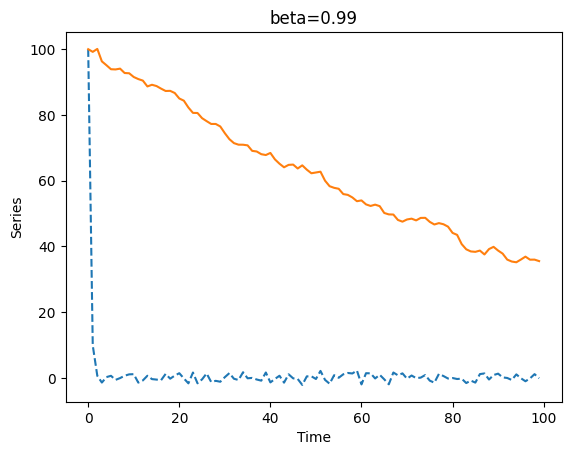

In [65]:
#第一題b
B_0=0
B_11=0.1
B_21=0.99
y = [100] * 100
x = [100] * 100
for i in range(1,100):
  x[i]=B_0 + B_11*x[i-1] + np.random.randn()
  y[i]= B_0 + B_21*y[i-1] + np.random.randn()

plt.plot(x,'--')
plt.plot(y,'-')
plt.title('beta=0.99')
plt.xlabel('Time')
plt.ylabel('Series')

In [66]:
#第一題c
B_0=0
B_1=0.2
B_2=0.5
y = [100] * 100
for i in range(1,100):
  y[i]=B_0 + B_1*y[i-1] + B_2*y[i-2] + np.random.randn()
#模擬AR(2)
model = AutoReg(y, lags=2)
AR_2_Model = model.fit()
print(AR_2_Model.summary())



                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -122.876
Method:               Conditional MLE   S.D. of innovations              0.848
Date:                Fri, 21 Mar 2025   AIC                            253.753
Time:                        10:27:27   BIC                            264.093
Sample:                             2   HQIC                           257.935
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1834      0.089     -2.062      0.039      -0.358      -0.009
y.L1           0.1949      0.049      3.942      0.000       0.098       0.292
y.L2           0.5014      0.039     12.942      0.0

In [67]:
#第二題a

data = yf.download('TWDUSD=X',start='2023-01-01',end='2025-02-28')
data = data[['Close']]
data.columns = ['price_twdusd']
y = data.price_twdusd
x = sm.add_constant(data.price_twdusd.shift(1))
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

#p-value=0.08<0.1,所以B_1*顯著



[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:           price_twdusd   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.449e+04
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 4274.6
No. Observations:                 562   AIC:                            -8545.
Df Residuals:                     560   BIC:                            -8536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      1.755   

In [68]:
#第二題b
#載入S&P500 時間:2023-2025-02-28
data = yf.download('^GSPC',start='2023-01-01',end='2025-02-28')
data = data[['Close']]

#報酬率計算
data = (data[['Close']].shift(1)-data[['Close']])/data[['Close']]
#欄位命名
data.columns = ['return_twdusd']
y = data.return_twdusd
x = sm.add_constant(data.return_twdusd.shift(1))
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

#p-value=0.041<0.05,所以B_1**顯著

[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:          return_twdusd   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5397
Date:                Fri, 21 Mar 2025   Prob (F-statistic):              0.463
Time:                        10:27:34   Log-Likelihood:                 1826.9
No. Observations:                 538   AIC:                            -3650.
Df Residuals:                     536   BIC:                            -3641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0007      0.000     -2.050

In [30]:
data.head()

,return_twdusd
Date,
2023-01-03,NaN
2023-01-04,-0.007483
2023-01-05,0.011783
2023-01-06,-0.022331
2023-01-09,0.000768


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540 entries, 2023-01-03 to 2025-02-27
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   return_twdusd  539 non-null    float64
dtypes: float64(1)
memory usage: 8.4 KB


In [69]:
#第二題c
data = yf.download('BTC-USD',start='2023-01-01',end='2025-02-28')
data = data[['Close']]
data = (data[['Close']].shift(1)-data[['Close']])/data[['Close']]
data.columns = ['return_bitusd']
y = data.return_bitusd
x = sm.add_constant(data.return_bitusd.shift(1))
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

#p-value=0.08<0.1,所以B_1**顯著

[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:          return_bitusd   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5099
Date:                Fri, 21 Mar 2025   Prob (F-statistic):              0.475
Time:                        10:27:45   Log-Likelihood:                 1786.9
No. Observations:                 787   AIC:                            -3570.
Df Residuals:                     785   BIC:                            -3560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0018      0.001     -2.004